Case Study Number 1

LINK VIDEO PRESENTASI :
https://drive.google.com/file/d/1iPI10z60tBJYjNJnGqPVuv1Fxs6GiBBn/view?usp=sharing

Video links :
1. https://www.youtube.com/watch?v=ovWY9NZXsPA
2. https://www.youtube.com/watch?v=mEwoAV5_dcA
3. https://www.youtube.com/watch?v=7TlVncuh5Lo
4. https://www.youtube.com/watch?v=ibEC76Emme8
5.  https://www.youtube.com/watch?v=DY10uyDy3vQ

In [ ]:
pip install youtube_comment_downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
# A. Scrapping

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from youtube_comment_downloader import YoutubeCommentDownloader
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Video - video yang commentnya akan di scrap

downloader = YoutubeCommentDownloader()
videos = ['ovWY9NZXsPA', 'mEwoAV5_dcA', '7TlVncuh5Lo', 'ibEC76Emme8', 'DY10uyDy3vQ']

In [ ]:
# Mengambil dan membuat list 30 comment dari masing - masing video

def getcom(videos, max_comments=50):
    comments = []
    for video_id in videos:
        video_comments = list(downloader.get_comments_from_url(f'https://www.youtube.com/watch?v={video_id}'))[:30]
        comments.extend(video_comments)

    return comments

In [ ]:
# Menaruh kumpulan comment dalam sebuah tabel dan menunjukkan jumlah comment yang diambil

comments = getcom(videos, max_comments=30)
data = pd.DataFrame(comments)
data['comment_text'] = data['text']
print(f"{len(data)}")

150


In [ ]:
# B. Preprocessing

def preprocess_text(text):

    #Cleansing
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    #Tokenization
    tokens = word_tokenize(text)

    #Remove stopwords dan Lemmmatization
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
#Preprocessing masing - masing comment dan menunjukkan beberapa contoh comment

data['processed_comment'] = data['comment_text'].apply(preprocess_text)

print(data[['comment_text', 'processed_comment']].head())

                                        comment_text  \
0  izin tanya pak, untuk data training kan data f...   
1  Pak maaf kalo aplikasi rapidminernya download ...   
2                      data saya engga bisa di input   
3  Pak rapidminer sama oranger data mining bagus ...   
4  Saya bukan orang kuliahan informatika pak.. ta...   

                                   processed_comment  
0  izin data training data full ya data testing d...  
1  maaf kalo aplikasi rapidminernya download nya ...  
2                                   data engga input  
3               rapidminer oranger data mining bagus  
4  orang kuliah informatika senang dengar jelas a...  


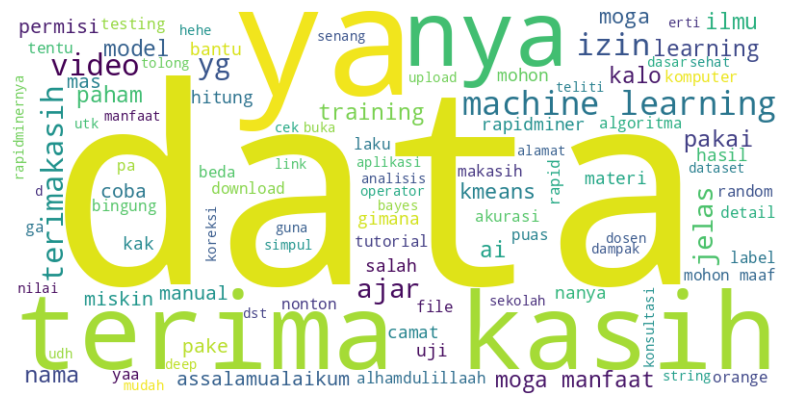

In [ ]:
# C. Visualization

#Membuat dan menampilkan word cloud, yaitu kata - kata yang paling sering muncul
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(' '.join(data['processed_comment']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.show()

In [ ]:
# Menunjukkan 10 kata yang paling sering muncul dan berapa kali kata tersebut muncul

all_words = ' '.join(data['processed_comment'])
words = all_words.split()
word_freq = Counter(words).most_common(10)
print("\nBeberapa kata yang paling sering muncul:")
for word, freq in word_freq:
    print(f"{word}: {freq} kali")


Beberapa kata yang paling sering muncul:
data: 57 kali
ya: 39 kali
terima: 27 kali
kasih: 27 kali
learning: 26 kali
nya: 20 kali
machine: 18 kali
izin: 16 kali
terimakasih: 15 kali
video: 15 kali


In [ ]:
#D. Vectorization

# Count Vectorization
# Menyiapkan data, melakukan Count Vectorization, dan menampilkan hasil data
processed_texts = [' '.join(tokens.split()) for tokens in data['processed_comment']]  # Membuat list teks yang sudah diproses

count_v = CountVectorizer()
X_count = count_v.fit_transform(processed_texts)

print("Sample fitur :", count_v.get_feature_names_out()[:10])
print(f"Jumlah fitur : {len(count_v.get_feature_names_out())}")
print("Bentuk matrix :", X_count.shape)

Sample fitur : ['aamiin' 'abc' 'acak' 'acu' 'aduh' 'age' 'ahh' 'ai' 'ajar' 'akurasi']
Jumlah fitur : 608
Bentuk matrix : (150, 608)


In [ ]:
# TF-IDF Vectorization
# Melakukan Vectorization TF-IDF dan menampilkan hasil data

tfidf_v = TfidfVectorizer()
X_tfidf = tfidf_v.fit_transform(processed_texts)

print("Sample fitur :", tfidf_v.get_feature_names_out()[:10])
print(f"Jumlah fitur : {len(tfidf_v.get_feature_names_out())}")
print("Bentuk matrix :", X_tfidf.shape)

Sample fitur : ['aamiin' 'abc' 'acak' 'acu' 'aduh' 'age' 'ahh' 'ai' 'ajar' 'akurasi']
Jumlah fitur : 608
Bentuk matrix : (150, 608)


In [ ]:
# Menghitung total skor tf-idf untuk masing-masing kata
tfidf_scores = X_tfidf.sum(axis=0).A1
words = tfidf_v.get_feature_names_out()
tfidf_dict = dict(zip(words, tfidf_scores))
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)

print("\nKata-kata dengan skor TF-IDF tertinggi:")
for word, score in sorted_tfidf[:10]:
    print(f"{word}: {score:.4f}")


Kata-kata dengan skor TF-IDF tertinggi:
kasih: 8.5191
terima: 8.5191
data: 8.4490
ya: 7.2200
learning: 5.1602
moga: 4.7770
nya: 4.2504
machine: 4.1295
video: 4.0743
manfaat: 3.7742
